In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

In [2]:
dataset = 'mnist'
model = 'small_cnn'
rounds = 100
iid = True
data_type = 'iid'
title_name = 'IID, Small CNN'
ylim = [0.5,50]

data = pd.DataFrame()

In [3]:
name = data_type+'_FedAvg+filter+globalB+localB'

frac = 0.1
local_ep = 5
local_bs = 10
top_percent = 0.1
local_buffer = True
global_buffer = True

loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                        local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

loss_trains=loaded_arrays['loss_trains']
acc_trains=loaded_arrays['acc_trains']
acc_tests=loaded_arrays['acc_trains']
data['loss_trains_'+name] = loss_trains
data['acc_trains_'+name] = acc_trains
data['acc_tests_'+name] = acc_tests

In [4]:
name = data_type+'_FedAvg+filter+localB'

frac = 0.1
local_ep = 5
local_bs = 10
top_percent = 0.1
local_buffer = True
global_buffer = False

loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                        local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

loss_trains=loaded_arrays['loss_trains']
acc_trains=loaded_arrays['acc_trains']
acc_tests=loaded_arrays['acc_trains']
data['loss_trains_'+name] = loss_trains
data['acc_trains_'+name] = acc_trains
data['acc_tests_'+name] = acc_tests

In [5]:
name = data_type+'_FedAvg+filter+globalB'

frac = 0.1
local_ep = 5
local_bs = 10
top_percent = 0.1
local_buffer = False
global_buffer = True

loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                        local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

loss_trains=loaded_arrays['loss_trains']
acc_trains=loaded_arrays['acc_trains']
acc_tests=loaded_arrays['acc_trains']
data['loss_trains_'+name] = loss_trains
data['acc_trains_'+name] = acc_trains
data['acc_tests_'+name] = acc_tests

In [6]:
name = data_type+'_FedAvg+filter'

frac = 0.1
local_ep = 5
local_bs = 10
top_percent = 0.1
local_buffer = False
global_buffer = False

loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                        local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

loss_trains=loaded_arrays['loss_trains']
acc_trains=loaded_arrays['acc_trains']
acc_tests=loaded_arrays['acc_trains']
data['loss_trains_'+name] = loss_trains
data['acc_trains_'+name] = acc_trains
data['acc_tests_'+name] = acc_tests

In [7]:
name = data_type+'_FedAvg+globalB+localB'

frac = 0.1
local_ep = 5
local_bs = 10
top_percent = 1.0
local_buffer = True
global_buffer = True

loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                        local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

loss_trains=loaded_arrays['loss_trains']
acc_trains=loaded_arrays['acc_trains']
acc_tests=loaded_arrays['acc_trains']
data['loss_trains_'+name] = loss_trains
data['acc_trains_'+name] = acc_trains
data['acc_tests_'+name] = acc_tests

In [8]:
name = data_type+'_FedAvg'

frac = 0.1
local_ep = 5
local_bs = 10
top_percent = 1.0
local_buffer = False
global_buffer = False

loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                        local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

loss_trains=loaded_arrays['loss_trains']
acc_trains=loaded_arrays['acc_trains']
acc_tests=loaded_arrays['acc_trains']
data['loss_trains_'+name] = loss_trains
data['acc_trains_'+name] = acc_trains
data['acc_tests_'+name] = acc_tests

In [12]:
for alpha in [0.02,0.05,0.1,0.2,0.5]:

    name = data_type+'_alpha'+str(alpha)

    frac = 0.1
    local_ep = 5
    local_bs = 10
    top_percent = alpha
    local_buffer = True
    global_buffer = True

    loaded_arrays = np.load('./save_results/fed_{}_{}_{}_C{}_E{}_B{}_alpha{}_iid{}_localB{}_globalB{}.npz'.format(dataset, model, rounds, frac, 
                                                                            local_ep, local_bs, top_percent, iid, local_buffer, global_buffer)) 

    loss_trains=loaded_arrays['loss_trains']
    acc_trains=loaded_arrays['acc_trains']
    acc_tests=loaded_arrays['acc_trains']
    data['loss_trains_'+name] = loss_trains
    data['acc_trains_'+name] = acc_trains
    data['acc_tests_'+name] = acc_tests

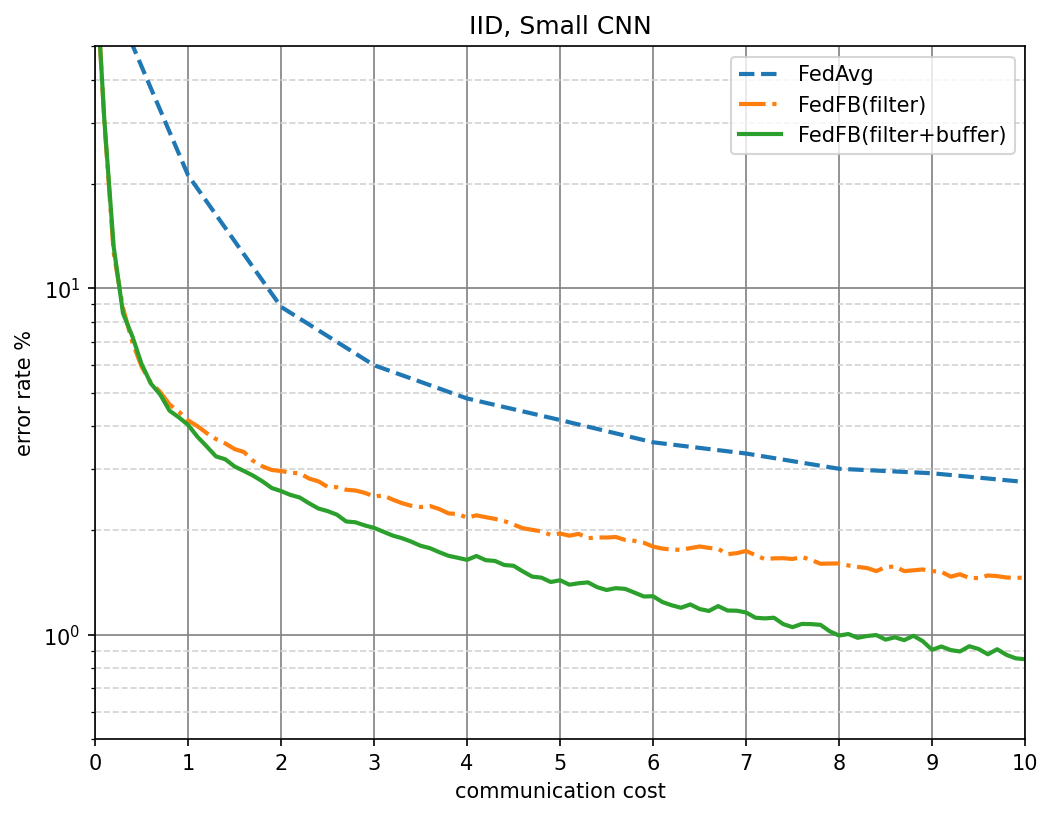

In [9]:
x0 = np.linspace(0, 10, 11)
x = np.linspace(0, 10, 101)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_yscale("log")

markersize=4
linewidth=2
# Plot the curves
y0 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg'].values[:10], 0, 90)
y1 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter'].values, 0, 90)
y2 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter+globalB+localB'].values, 0, 90)
ax.plot(x0, y0, label='FedAvg', linestyle="--", linewidth=linewidth)
ax.plot(x, y1, label='FedFB(filter)', linestyle="-.", linewidth=linewidth)
ax.plot(x, y2, label='FedFB(filter+buffer)', linestyle="-", linewidth=linewidth)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=15))
ax.grid(which="major", color="gray", linestyle="-")
ax.grid(which="minor", axis="y", color="lightgray", linestyle="--")

ax.set_xlim(0, 10)
ax.set_ylim(ylim[0], ylim[1])

# Set axis labels
ax.set_xlabel('communication cost')
ax.set_ylabel('error rate %')

# Set the plot title
ax.set_title(title_name)

# Add a legend
ax.legend()

# Show the plot
plt.show()

fig.savefig(title_name+", error vs communication.png")

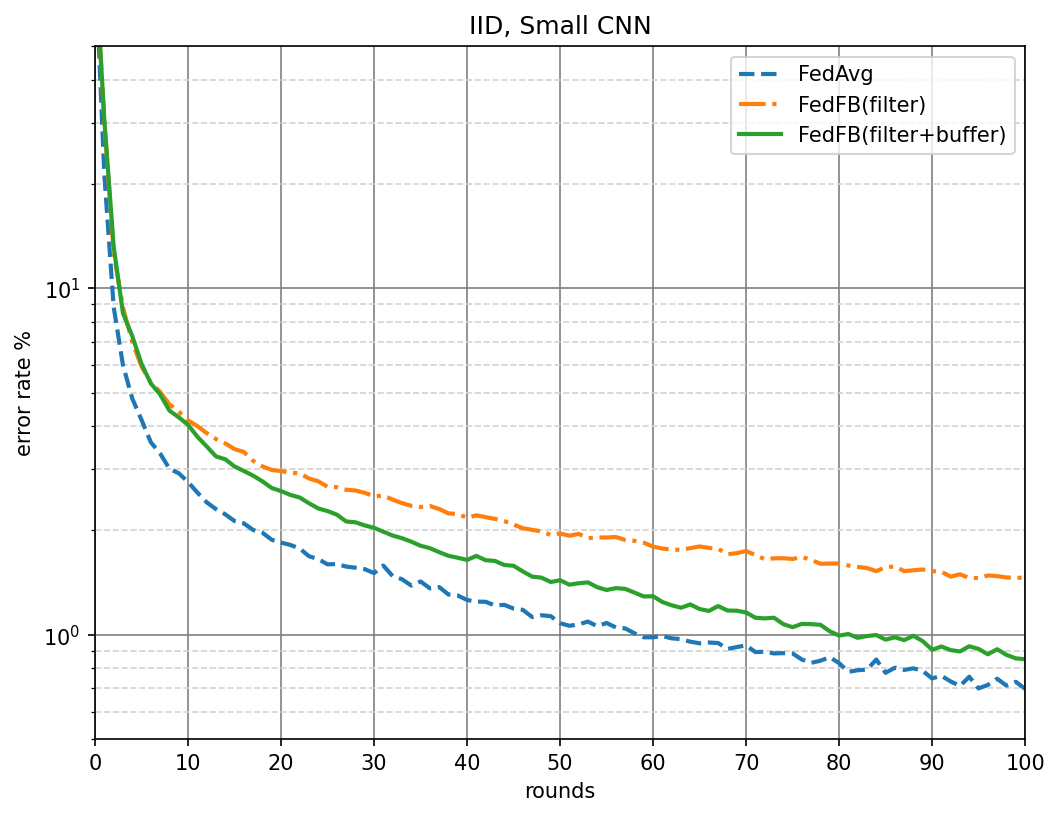

In [10]:
x0 = np.linspace(0, 100, 101)
x = np.linspace(0, 100, 101)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_yscale("log")

markersize=4
linewidth=2
# Plot the curves
y0 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg'].values, 0, 90)
y1 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter'].values, 0, 90)
y2 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter+globalB+localB'].values, 0, 90)
ax.plot(x0, y0, label='FedAvg', linestyle="--", linewidth=linewidth)
ax.plot(x, y1, label='FedFB(filter)', linestyle="-.", linewidth=linewidth)
ax.plot(x, y2, label='FedFB(filter+buffer)', linestyle="-", linewidth=linewidth)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=15))
ax.grid(which="major", color="gray", linestyle="-")
ax.grid(which="minor", axis="y", color="lightgray", linestyle="--")

ax.set_xlim(0, 100)
ax.set_ylim(ylim[0], ylim[1])

# Set axis labels
ax.set_xlabel('rounds')
ax.set_ylabel('error rate %')

# Set the plot title
ax.set_title(title_name)

# Add a legend
ax.legend()

# Show the plot
plt.show()

fig.savefig(title_name+", error vs round.png")

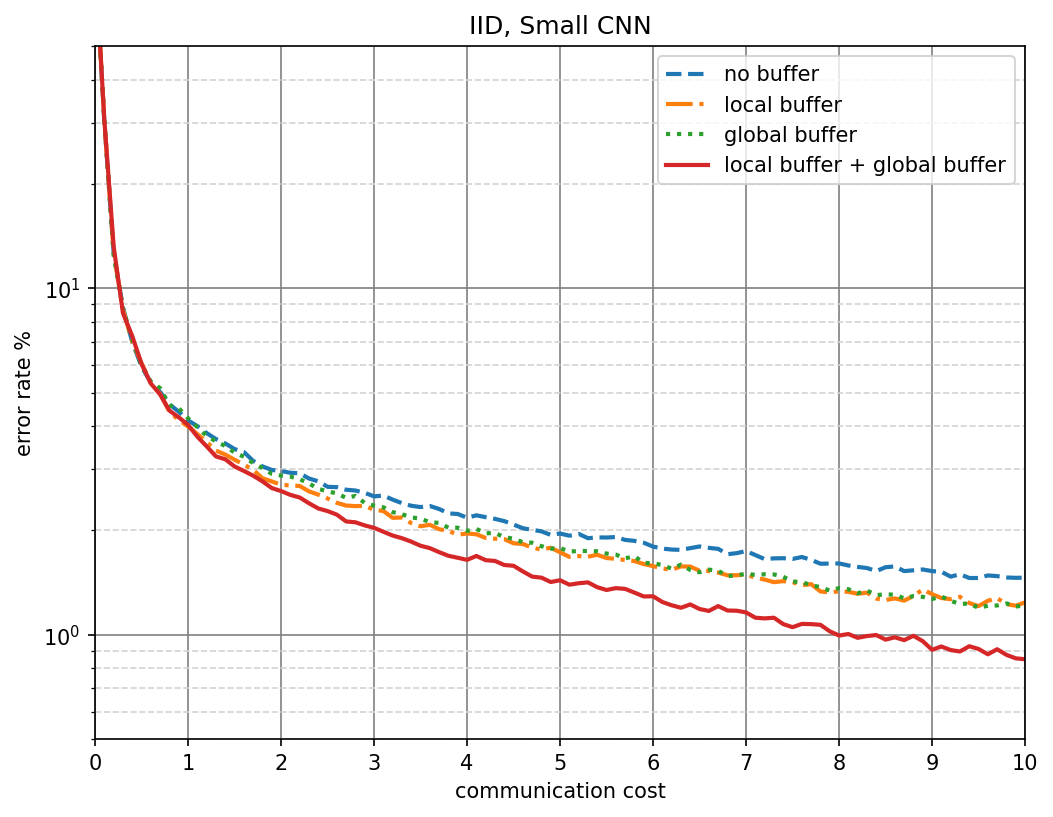

In [11]:
x0 = np.linspace(0, 10, 11)
x = np.linspace(0, 10, 101)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_yscale("log")

markersize=4
linewidth=2
# Plot the curves
y0 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter'].values, 0, 90)
y1 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter+globalB'].values, 0, 90)
y2 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter+localB'].values, 0, 90)
y3 = np.insert(100-data['acc_tests_'+data_type+'_FedAvg+filter+globalB+localB'].values, 0, 90)
ax.plot(x, y0, label='no buffer', linestyle="--", linewidth=linewidth)
ax.plot(x, y1, label='local buffer', linestyle="-.", linewidth=linewidth)
ax.plot(x, y2, label='global buffer', linestyle=":", linewidth=linewidth)
ax.plot(x, y3, label='local buffer + global buffer', linestyle="-", linewidth=linewidth)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=15))
ax.grid(which="major", color="gray", linestyle="-")
ax.grid(which="minor", axis="y", color="lightgray", linestyle="--")

ax.set_xlim(0, 10)
ax.set_ylim(ylim[0], ylim[1])

# Set axis labels
ax.set_xlabel('communication cost')
ax.set_ylabel('error rate %')

# Set the plot title
ax.set_title(title_name)

# Add a legend
ax.legend()

# Show the plot
plt.show()

fig.savefig(title_name+", buffer ablation.png")

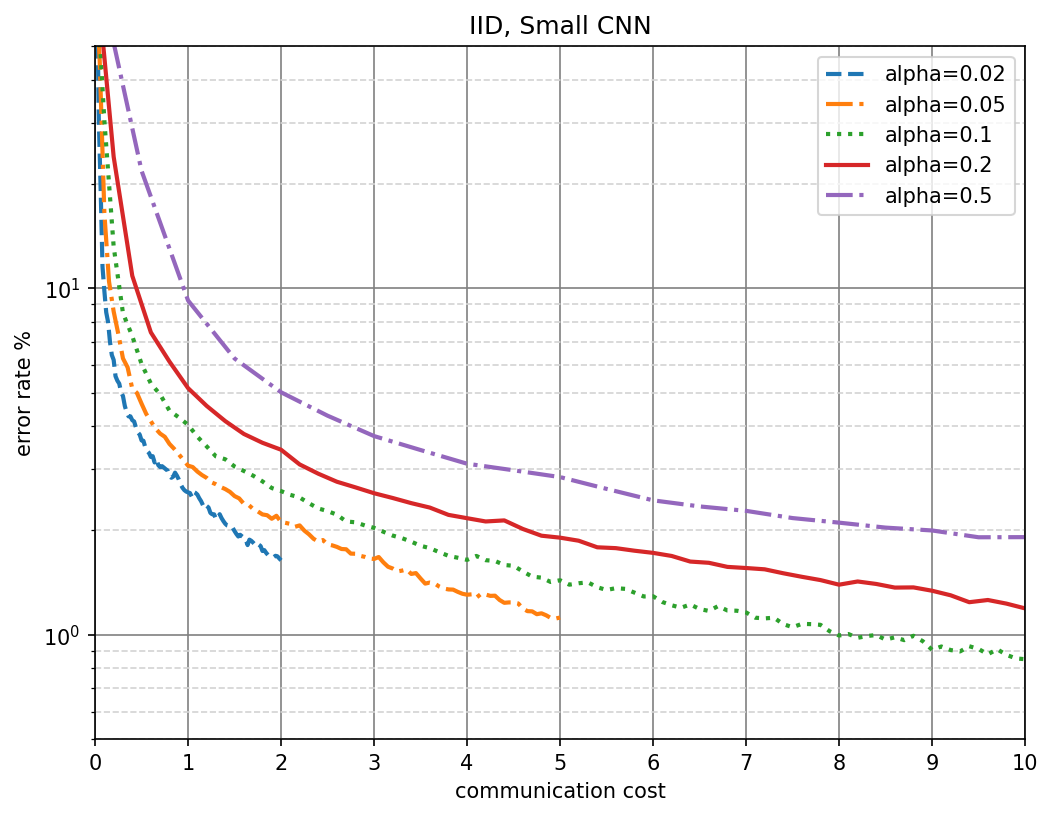

In [17]:
x0 = np.linspace(0, 2, 101)
x1 = np.linspace(0, 5, 101)
x2 = np.linspace(0, 10, 101)
x3 = np.linspace(0, 20, 101)
x4 = np.linspace(0, 50, 101)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_yscale("log")

markersize=4
linewidth=2
# Plot the curves
y0 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.02'].values, 0, 90)
y1 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.05'].values, 0, 90)
y2 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.1'].values, 0, 90)
y3 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.2'].values, 0, 90)
y4 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.5'].values, 0, 90)
ax.plot(x0, y0, label='alpha=0.02', linestyle="--", linewidth=linewidth)
ax.plot(x1, y1, label='alpha=0.05', linestyle="-.", linewidth=linewidth)
ax.plot(x2, y2, label='alpha=0.1', linestyle=":", linewidth=linewidth)
ax.plot(x3, y3, label='alpha=0.2', linestyle="-", linewidth=linewidth)
ax.plot(x4, y4, label='alpha=0.5', linestyle="-.", linewidth=linewidth)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=15))
ax.grid(which="major", color="gray", linestyle="-")
ax.grid(which="minor", axis="y", color="lightgray", linestyle="--")

ax.set_xlim(0, 10)
ax.set_ylim(ylim[0], ylim[1])

# Set axis labels
ax.set_xlabel('communication cost')
ax.set_ylabel('error rate %')

# Set the plot title
ax.set_title(title_name)

# Add a legend
ax.legend()

# Show the plot
plt.show()

fig.savefig(title_name+", alpha ablation (error vs communication).png")

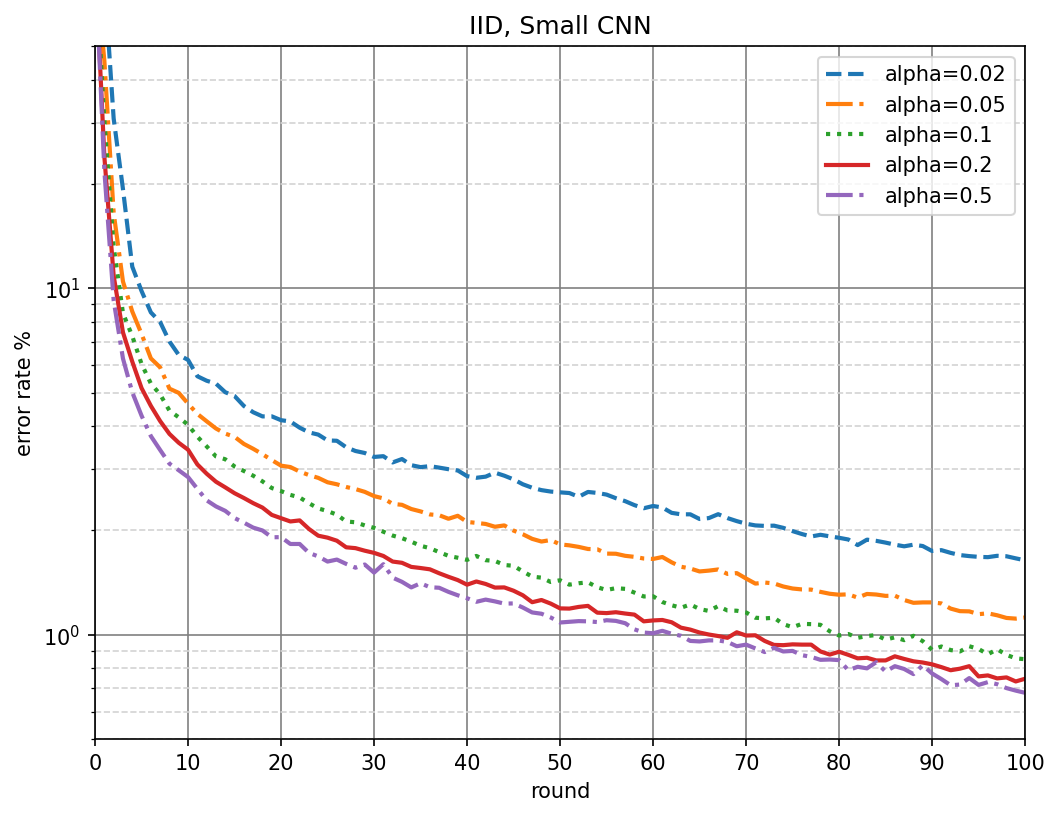

In [16]:
x0 = np.linspace(0, 10, 11)
x = np.linspace(0, 100, 101)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8,6),dpi=150)
ax.set_yscale("log")

markersize=4
linewidth=2
# Plot the curves
y0 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.02'].values, 0, 90)
y1 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.05'].values, 0, 90)
y2 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.1'].values, 0, 90)
y3 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.2'].values, 0, 90)
y4 = np.insert(100-data['acc_tests_'+data_type+'_alpha0.5'].values, 0, 90)
ax.plot(x, y0, label='alpha=0.02', linestyle="--", linewidth=linewidth)
ax.plot(x, y1, label='alpha=0.05', linestyle="-.", linewidth=linewidth)
ax.plot(x, y2, label='alpha=0.1', linestyle=":", linewidth=linewidth)
ax.plot(x, y3, label='alpha=0.2', linestyle="-", linewidth=linewidth)
ax.plot(x, y4, label='alpha=0.5', linestyle="-.", linewidth=linewidth)

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=15))
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9), numticks=15))
ax.grid(which="major", color="gray", linestyle="-")
ax.grid(which="minor", axis="y", color="lightgray", linestyle="--")

ax.set_xlim(0, 100)
ax.set_ylim(ylim[0], ylim[1])

# Set axis labels
ax.set_xlabel('round')
ax.set_ylabel('error rate %')

# Set the plot title
ax.set_title(title_name)

# Add a legend
ax.legend()

# Show the plot
plt.show()

fig.savefig(title_name+", alpha ablation (error vs round).png")